In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"

netflix_data = pd.read_csv("../datnetflix_content_2023.csv")

netflix_data.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,"62,28,00,000",Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,"50,77,00,000",English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"50,30,00,000",English,Movie


## data cleaning

In [2]:
netflix_data['Hours Viewed'] = netflix_data['Hours Viewed'].replace(',', '', regex=True).astype(float)

netflix_data[['Title', 'Hours Viewed']].head()

,Title,Hours Viewed
0,The Night Agent: Season 1,812100000.0
1,Ginny & Georgia: Season 2,665100000.0
2,The Glory: Season 1 // 더 글로리: 시즌 1,622800000.0
3,Wednesday: Season 1,507700000.0
4,Queen Charlotte: A Bridgerton Story,503000000.0


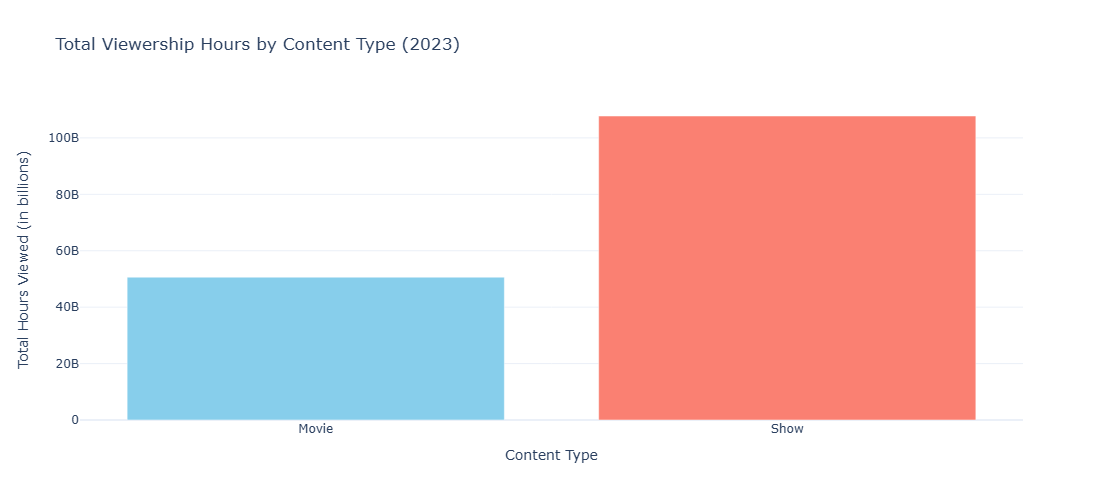

Content Type
Movie    5.063780e+10
Show     1.077641e+11
Name: Hours Viewed, dtype: float64

In [4]:
# aggregate viewership hours by content type
content_type_viewership = netflix_data.groupby('Content Type')['Hours Viewed'].sum()

fig = go.Figure(data=[
    go.Bar(
        x=content_type_viewership.index,
        y=content_type_viewership.values,
        marker_color=['skyblue', 'salmon']
    )
])

fig.update_layout(
    title='Total Viewership Hours by Content Type (2023)',
    xaxis_title='Content Type',
    yaxis_title='Total Hours Viewed (in billions)',
    xaxis_tickangle=0,
    height=500,
    width=800
)

fig.show()
content_type_viewership 


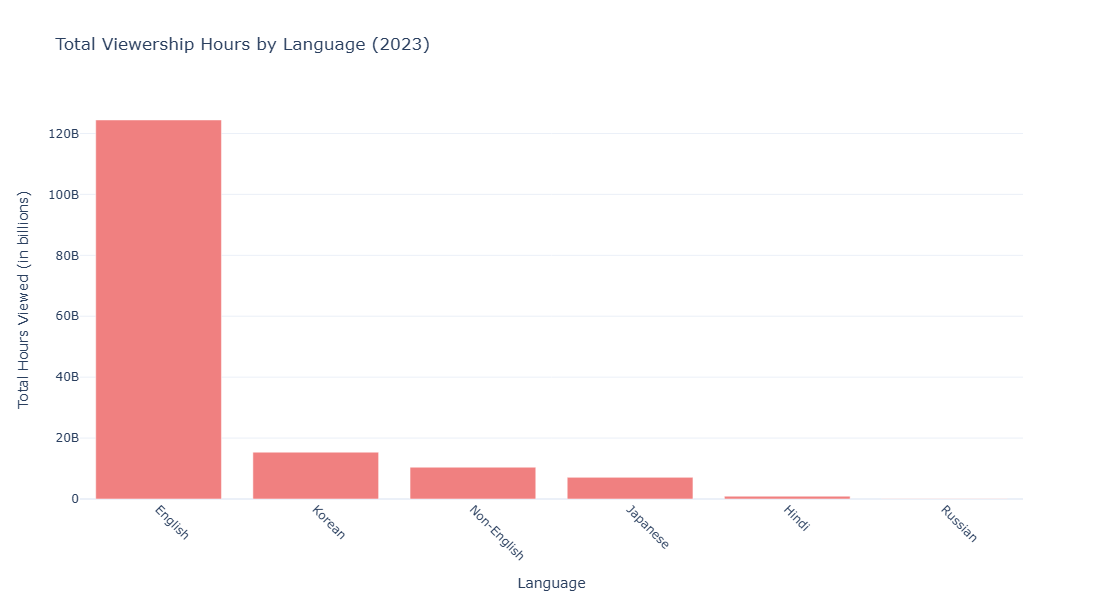

In [5]:
# aggregate viewership hours by language
language_viewership = netflix_data.groupby('Language Indicator')['Hours Viewed'].sum().sort_values(ascending=False)

fig = go.Figure(data=[
    go.Bar(
        x=language_viewership.index,
        y=language_viewership.values,
        marker_color='lightcoral'
    )
])

fig.update_layout(
    title='Total Viewership Hours by Language (2023)',
    xaxis_title='Language',
    yaxis_title='Total Hours Viewed (in billions)',
    xaxis_tickangle=45,
    height=600,
    width=1000
)

fig.show()

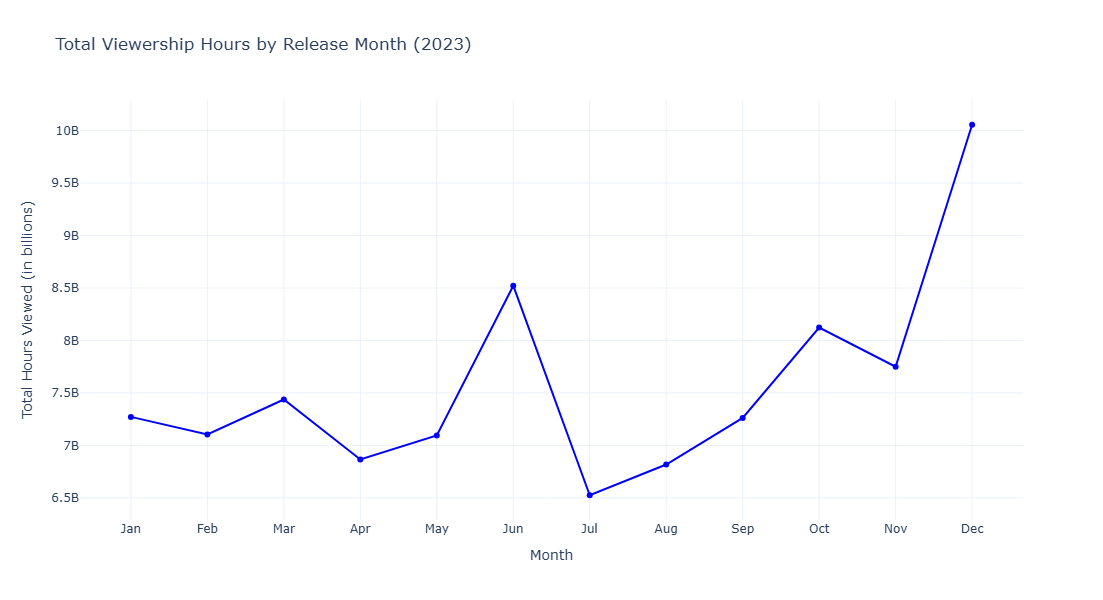

In [6]:
# convert the "Release Date" to a datetime format and extract the month
netflix_data['Release Date'] = pd.to_datetime(netflix_data['Release Date'])
netflix_data['Release Month'] = netflix_data['Release Date'].dt.month

# aggregate viewership hours by release month
monthly_viewership = netflix_data.groupby('Release Month')['Hours Viewed'].sum()

fig = go.Figure(data=[
    go.Scatter(
        x=monthly_viewership.index,
        y=monthly_viewership.values,
        mode='lines+markers',
        marker=dict(color='blue'),
        line=dict(color='blue')
    )
])

fig.update_layout(
    title='Total Viewership Hours by Release Month (2023)',
    xaxis_title='Month',
    yaxis_title='Total Hours Viewed (in billions)',
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(1, 13)),
        ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ),
    height=600,
    width=1000
)

fig.show()

In [7]:
# extract the top 5 titles based on viewership hours
top_5_titles = netflix_data.nlargest(5, 'Hours Viewed')

top_5_titles[['Title', 'Hours Viewed', 'Language Indicator', 'Content Type', 'Release Date']]


,Title,Hours Viewed,Language Indicator,Content Type,Release Date
0,The Night Agent: Season 1,812100000.0,English,Show,2023-03-23
1,Ginny & Georgia: Season 2,665100000.0,English,Show,2023-01-05
18227,King the Land: Limited Series // 킹더랜드: 리미티드 시리즈,630200000.0,Korean,Movie,2023-06-17
2,The Glory: Season 1 // 더 글로리: 시즌 1,622800000.0,Korean,Show,2022-12-30
18214,ONE PIECE: Season 1,541900000.0,English,Show,2023-08-31


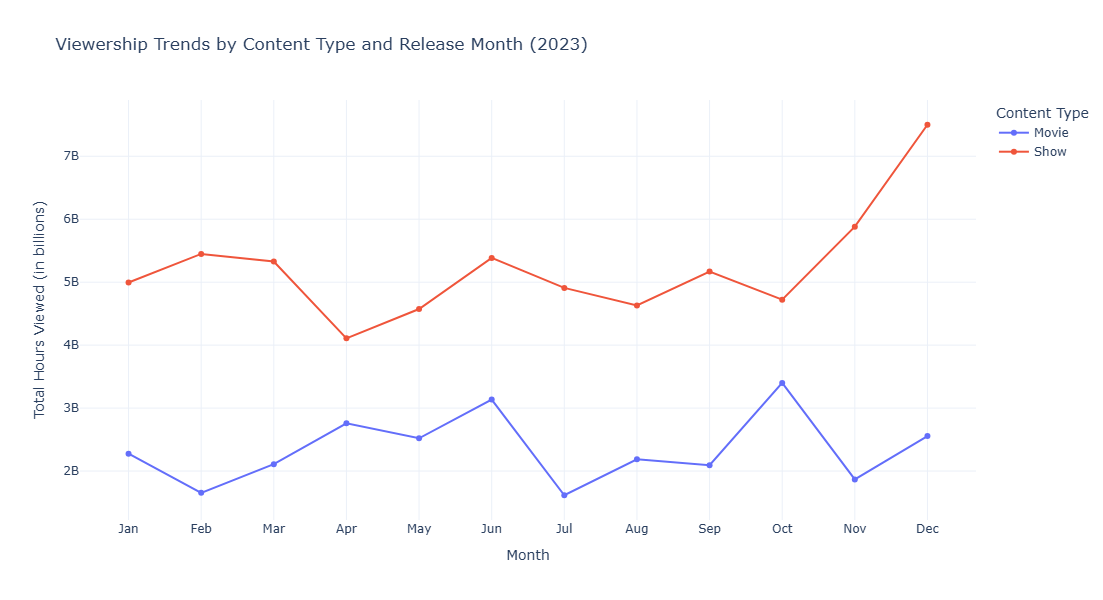

In [8]:
# aggregate viewership hours by content type and release month
monthly_viewership_by_type = netflix_data.pivot_table(index='Release Month',
                                                      columns='Content Type',
                                                      values='Hours Viewed',
                                                      aggfunc='sum')

fig = go.Figure()

for content_type in monthly_viewership_by_type.columns:
    fig.add_trace(
        go.Scatter(
            x=monthly_viewership_by_type.index,
            y=monthly_viewership_by_type[content_type],
            mode='lines+markers',
            name=content_type
        )
    )

fig.update_layout(
    title='Viewership Trends by Content Type and Release Month (2023)',
    xaxis_title='Month',
    yaxis_title='Total Hours Viewed (in billions)',
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(1, 13)),
        ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ),
    height=600,
    width=1000,
    legend_title='Content Type'
)

fig.show()

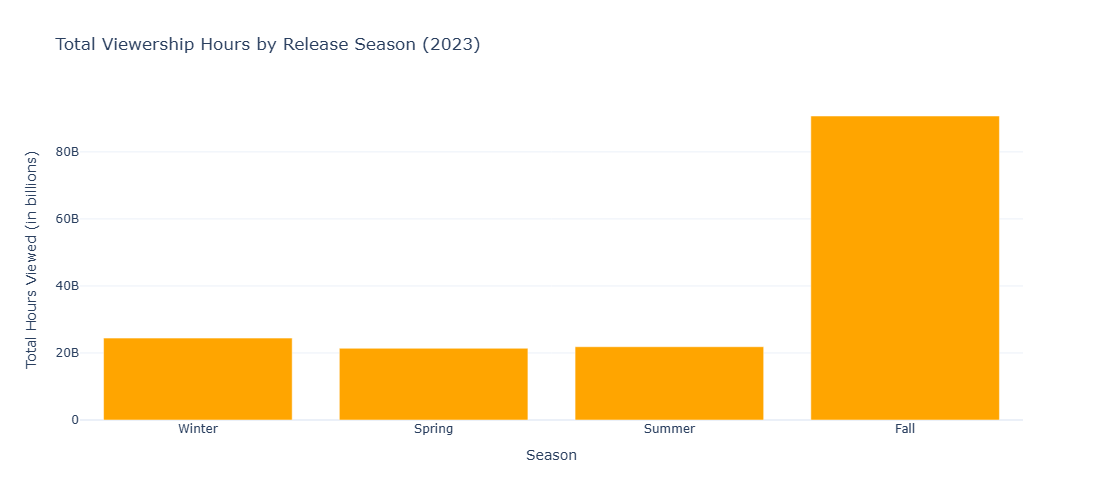

In [9]:
# define seasons based on release months
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# apply the season categorization to the dataset
netflix_data['Release Season'] = netflix_data['Release Month'].apply(get_season)

# aggregate viewership hours by release season
seasonal_viewership = netflix_data.groupby('Release Season')['Hours Viewed'].sum()

# order the seasons as 'Winter', 'Spring', 'Summer', 'Fall'
seasons_order = ['Winter', 'Spring', 'Summer', 'Fall']
seasonal_viewership = seasonal_viewership.reindex(seasons_order)

fig = go.Figure(data=[
    go.Bar(
        x=seasonal_viewership.index,
        y=seasonal_viewership.values,
        marker_color='orange'
    )
])

fig.update_layout(
    title='Total Viewership Hours by Release Season (2023)',
    xaxis_title='Season',
    yaxis_title='Total Hours Viewed (in billions)',
    xaxis_tickangle=0,
    height=500,
    width=800,
    xaxis=dict(
        categoryorder='array',
        categoryarray=seasons_order
    )
)

fig.show()

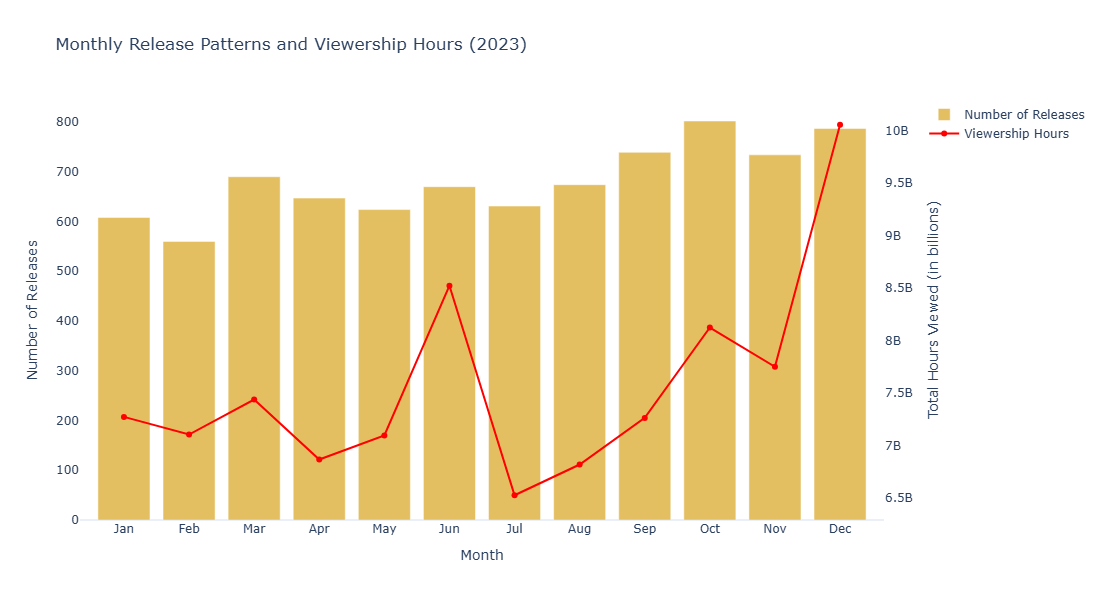

In [11]:
monthly_releases = netflix_data['Release Month'].value_counts().sort_index()

monthly_viewership = netflix_data.groupby('Release Month')['Hours Viewed'].sum()

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=monthly_releases.index,
        y=monthly_releases.values,
        name='Number of Releases',
        marker_color='goldenrod', 
        opacity=0.7,
        yaxis='y1'
    )
)

fig.add_trace(
    go.Scatter(
        x=monthly_viewership.index,
        y=monthly_viewership.values,
        name='Viewership Hours',
        mode='lines+markers',
        marker=dict(color='red'),
        line=dict(color='red'),
        yaxis='y2'
    )
)

fig.update_layout(
    title='Monthly Release Patterns and Viewership Hours (2023)',
    xaxis=dict(
        title='Month',
        tickmode='array',
        tickvals=list(range(1, 13)),
        ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ),
    yaxis=dict(
        title='Number of Releases',
        showgrid=False,
        side='left'
    ),
    yaxis2=dict(
        title='Total Hours Viewed (in billions)',
        overlaying='y',
        side='right',
        showgrid=False
    ),
    legend=dict(
        x=1.05,  
        y=1,
        orientation='v',
        xanchor='left'
    ),
    height=600,
    width=1000
)

fig.show()

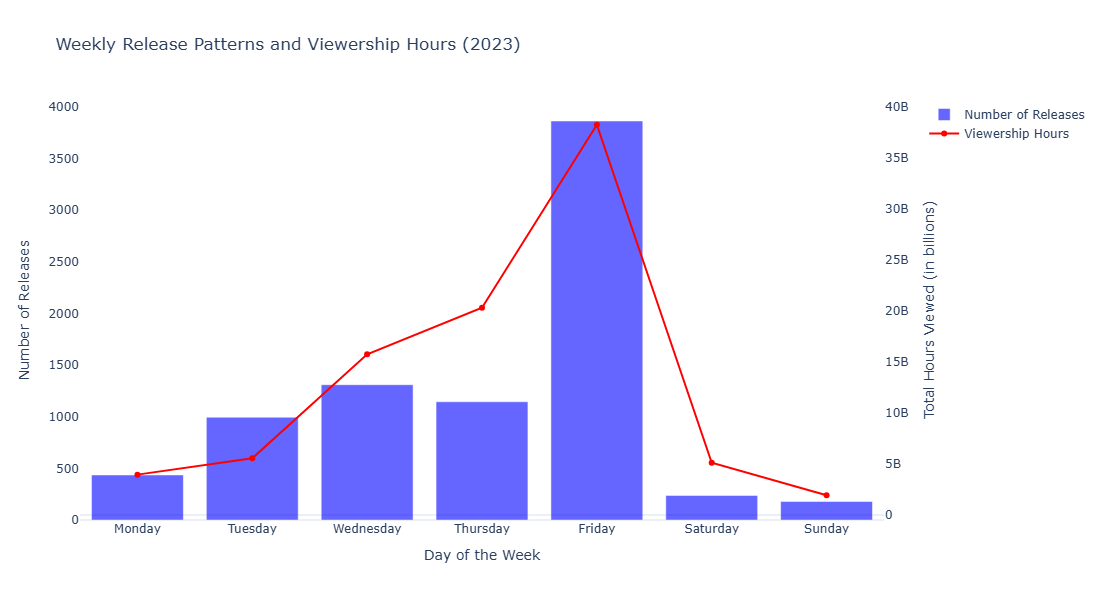

In [12]:
netflix_data['Release Day'] = netflix_data['Release Date'].dt.day_name()

weekday_releases = netflix_data['Release Day'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# aggregate viewership hours by day of the week
weekday_viewership = netflix_data.groupby('Release Day')['Hours Viewed'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=weekday_releases.index,
        y=weekday_releases.values,
        name='Number of Releases',
        marker_color='blue',
        opacity=0.6,
        yaxis='y1'
    )
)

fig.add_trace(
    go.Scatter(
        x=weekday_viewership.index,
        y=weekday_viewership.values,
        name='Viewership Hours',
        mode='lines+markers',
        marker=dict(color='red'),
        line=dict(color='red'),
        yaxis='y2'
    )
)

fig.update_layout(
    title='Weekly Release Patterns and Viewership Hours (2023)',
    xaxis=dict(
        title='Day of the Week',
        categoryorder='array',
        categoryarray=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    ),
    yaxis=dict(
        title='Number of Releases',
        showgrid=False,
        side='left'
    ),
    yaxis2=dict(
        title='Total Hours Viewed (in billions)',
        overlaying='y',
        side='right',
        showgrid=False
    ),
    legend=dict(
        x=1.05,  
        y=1,
        orientation='v',
        xanchor='left'
    ),
    height=600,
    width=1000
)

fig.show()

In [13]:
# define significant holidays and events in 2023
important_dates = [
    '2023-01-01',  # new year's day
    '2023-02-14',  # valentine's ay
    '2023-07-04',  # independence day (US)
    '2023-10-31',  # halloween
    '2023-12-25'   # christmas day
]

# convert to datetime
important_dates = pd.to_datetime(important_dates)

# check for content releases close to these significant holidays (within a 3-day window)
holiday_releases = netflix_data[netflix_data['Release Date'].apply(
    lambda x: any((x - date).days in range(-3, 4) for date in important_dates)
)]

# aggregate viewership hours for releases near significant holidays
holiday_viewership = holiday_releases.groupby('Release Date')['Hours Viewed'].sum()

holiday_releases[['Title', 'Release Date', 'Hours Viewed']]

,Title,Release Date,Hours Viewed
2,The Glory: Season 1 // 더 글로리: 시즌 1,2022-12-30,622800000.0
6,La Reina del Sur: Season 3,2022-12-30,429600000.0
11,Kaleidoscope: Limited Series,2023-01-01,252500000.0
29,Perfect Match: Season 1,2023-02-14,176800000.0
124,Lady Voyeur: Limited Series // Olhar Indiscret...,2022-12-31,86000000.0
...,...,...,...
22324,The Romantics: Limited Series,2023-02-14,1000000.0
22327,Aggretsuko: Season 5 // アグレッシブ烈子: シーズン5,2023-02-16,900000.0
22966,The Lying Life of Adults: Limited Series // La...,2023-01-04,900000.0
22985,Community Squad: Season 1 // División Palermo:...,2023-02-17,800000.0


In [17]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

import plotly.graph_objects as go

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Netflix Content Analysis Dashboard", style={'text-align': 'center'}),
    
    dcc.Tabs([
        dcc.Tab(label='Viewership by Content Type', children=[
            dcc.Graph(
                id='content-type-viewership',
                figure={
                    'data': [
                        go.Bar(
                            x=content_type_viewership.index,
                            y=content_type_viewership.values,
                            marker_color=['skyblue', 'salmon']
                        )
                    ],
                    'layout': go.Layout(
                        title='Total Viewership Hours by Content Type (2023)',
                        xaxis_title='Content Type',
                        yaxis_title='Total Hours Viewed (in billions)',
                        height=500,
                        width=800
                    )
                }
            )
        ]),
        
        dcc.Tab(label='Viewership by Language', children=[
            dcc.Graph(
                id='language-viewership',
                figure={
                    'data': [
                        go.Bar(
                            x=language_viewership.index,
                            y=language_viewership.values,
                            marker_color='lightcoral'
                        )
                    ],
                    'layout': go.Layout(
                        title='Total Viewership Hours by Language (2023)',
                        xaxis_title='Language',
                        yaxis_title='Total Hours Viewed (in billions)',
                        xaxis_tickangle=45,
                        height=600,
                        width=1000
                    )
                }
            )
        ]),
        
        dcc.Tab(label='Monthly Viewership Trends', children=[
            dcc.Graph(
                id='monthly-viewership',
                figure={
                    'data': [
                        go.Scatter(
                            x=monthly_viewership.index,
                            y=monthly_viewership.values,
                            mode='lines+markers',
                            marker=dict(color='blue'),
                            line=dict(color='blue')
                        )
                    ],
                    'layout': go.Layout(
                        title='Total Viewership Hours by Release Month (2023)',
                        xaxis_title='Month',
                        yaxis_title='Total Hours Viewed (in billions)',
                        xaxis=dict(
                            tickmode='array',
                            tickvals=list(range(1, 13)),
                            ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
                        ),
                        height=600,
                        width=1000
                    )
                }
            )
        ]),
        
        dcc.Tab(label='Top 5 Titles', children=[
            html.Table([
                html.Thead(
                    html.Tr([html.Th(col) for col in top_5_titles[['Title', 'Hours Viewed', 'Language Indicator', 'Content Type', 'Release Date']].columns])
                ),
                html.Tbody([
                    html.Tr([
                        html.Td(top_5_titles.iloc[i][col]) for col in top_5_titles[['Title', 'Hours Viewed', 'Language Indicator', 'Content Type', 'Release Date']].columns
                    ]) for i in range(len(top_5_titles))
                ])
            ])
        ]),
        
        dcc.Tab(label='Viewership by Season', children=[
            dcc.Graph(
                id='seasonal-viewership',
                figure={
                    'data': [
                        go.Bar(
                            x=seasonal_viewership.index,
                            y=seasonal_viewership.values,
                            marker_color='orange'
                        )
                    ],
                    'layout': go.Layout(
                        title='Total Viewership Hours by Release Season (2023)',
                        xaxis_title='Season',
                        yaxis_title='Total Hours Viewed (in billions)',
                        height=500,
                        width=800,
                        xaxis=dict(
                            categoryorder='array',
                            categoryarray=seasons_order
                        )
                    )
                }
            )
        ]),
        
        dcc.Tab(label='Weekly Release Patterns', children=[
            dcc.Graph(
                id='weekly-release-patterns',
                figure={
                    'data': [
                        go.Bar(
                            x=weekday_releases.index,
                            y=weekday_releases.values,
                            name='Number of Releases',
                            marker_color='blue',
                            opacity=0.6,
                            yaxis='y1'
                        ),
                        go.Scatter(
                            x=weekday_viewership.index,
                            y=weekday_viewership.values,
                            name='Viewership Hours',
                            mode='lines+markers',
                            marker=dict(color='red'),
                            line=dict(color='red'),
                            yaxis='y2'
                        )
                    ],
                    'layout': go.Layout(
                        title='Weekly Release Patterns and Viewership Hours (2023)',
                        xaxis=dict(
                            title='Day of the Week',
                            categoryorder='array',
                            categoryarray=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
                        ),
                        yaxis=dict(
                            title='Number of Releases',
                            showgrid=False,
                            side='left'
                        ),
                        yaxis2=dict(
                            title='Total Hours Viewed (in billions)',
                            overlaying='y',
                            side='right',
                            showgrid=False
                        ),
                        legend=dict(
                            x=1.05,  
                            y=1,
                            orientation='v',
                            xanchor='left'
                        ),
                        height=600,
                        width=1000
                    )
                }
            )
        ])
    ])
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port = 8051)

OSError: Address 'http://127.0.0.1:8051' already in use.
    Try passing a different port to run_server.